In [1]:
%pylab inline
!pip install python-mnist

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mnist.loader import MNIST
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

In [3]:
def Accuracy(y_true, y_pred):
  corr = 0
  for num,i in enumerate(y_true):
    if i==y_pred[num]:
      corr+=1
  corr /= len(y_true)
  return corr*100

In [4]:
def loadMNIST():
    mndata = MNIST('/content/MNIST')
    imagesTest, labelsTest = mndata.load_training()
    imagesTrain, labelsTrain = mndata.load_testing()
    return imagesTrain, labelsTrain, imagesTest, labelsTest
X_train, y_train, X_test, y_test = loadMNIST()
X_train = np.array(X_train)
X_test = np.array(X_test)

In [5]:
y_train_nn = np.array([ [0 for i in range(10)] for i in y_train ])
count = 0
for i in y_train:
    y_train_nn[count][i] = 1
    count+=1
y_test_nn = np.array([ [0 for i in range(10)] for i in y_test ])
count = 0
for i in y_test:
    y_test_nn[count][i] = 1
    count+=1

In [6]:
# Pad the data to get 32*32 input dimensions
X_train_pad = X_train.reshape(len(X_train), 28, 28)
X_test_pad = X_test.reshape(len(X_test), 28, 28)
X_train_pad = np.array([np.pad(i, (2)) for i in X_train_pad])
X_test_pad = np.array([np.pad(i, (2)) for i in X_test_pad])

In [7]:
# model
model = Sequential()
model.add(Conv2D(6, kernel_size=5, activation="tanh", input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(16, kernel_size=5, activation="tanh"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(120, kernel_size=5, activation="tanh"))
model.add(Flatten())
model.add(Dense(84, activation="tanh"))
model.add(Dense(10, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [8]:
# Compile, train and find accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_nn,
                    validation_data = (X_test_pad,y_test_nn), epochs=50, batch_size=64)

Epoch 1/50
157/157 [==============================] - 21s 130ms/step - loss: 0.4104 - accuracy: 0.8914 - val_loss: 0.1912 - val_accuracy: 0.9436
Epoch 2/50
157/157 [==============================] - 20s 126ms/step - loss: 0.1186 - accuracy: 0.9647 - val_loss: 0.1399 - val_accuracy: 0.9579
Epoch 3/50
157/157 [==============================] - 20s 126ms/step - loss: 0.0809 - accuracy: 0.9764 - val_loss: 0.1095 - val_accuracy: 0.9659
Epoch 4/50
157/157 [==============================] - 20s 127ms/step - loss: 0.0612 - accuracy: 0.9813 - val_loss: 0.1107 - val_accuracy: 0.9654
Epoch 5/50
157/157 [==============================] - 20s 126ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.1173 - val_accuracy: 0.9645
Epoch 6/50
157/157 [==============================] - 20s 125ms/step - loss: 0.0422 - accuracy: 0.9875 - val_loss: 0.1141 - val_accuracy: 0.9656
Epoch 7/50
157/157 [==============================] - 20s 126ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0956 - val_ac

In [9]:
print("Accuracy of Lenet 5: ",history.history["val_accuracy"][-1]*100, "%" )

Accuracy of Lenet 5:  98.02166819572449 %


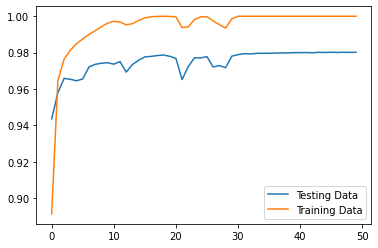

In [10]:
plot(history.history["val_accuracy"], label="Testing Data")
plot(history.history["accuracy"], label="Training Data")
legend()